Runge-Kutta method: Let an initial value problem be specified as follows: 

$$\frac{dy}{dt} = f(t, y), y(t_0)= y_0$$

and the method are given by:
$$y_{n+1} = y_n + \frac{h}{6}(k_1+2k_2+2k_3+k_4)$$
$$t_{n+1}=t_n+h$$
with
$$k_1 = f(t_n,y_n)$$
$$k_2 = f(t_n+h/2, y_n+hk_1/2)$$
$$k_3 = f(t_n+h/2,y_n+hk_2/2)$$
$$k_4 = f(t_n+h, y_n+hk_3)

Lotka-Volterra ODE
$$\frac{dx}{dt} = x (\alpha -\beta y)$$
$$\frac{dy}{dt} = y (\delta x -\gamma)$$

- $\alpha$ rate of growth of the prey population;
- $\gamma$ rate of decrease in the predator population;
- $\beta$ rate of decrease of the prey population;
- $\delta$ rate of growth of the predator population.

----------------------------------------------------------------------------------------------------------------------------------------------

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Numba_logo.svg/800px-Numba_logo.svg.png" width="55" height="55">


Numba is a compiler for Python array and numerical functions that gives you the power to speed up your applications with high performance functions written directly in Python.

Numba generates optimized machine code from pure Python code using the LLVM compiler infrastructure*. With a few simple annotations, array-oriented and math-heavy Python code can be just-in-time optimized to performance similar as C, C++ and Fortran, without having to switch languages or Python interpreters.

To teste the numba compiler we create the file called numba.ipynb. To run the compiler we need to use the command 

`from numba import jit`.

In general to use numba we can write the command decorator `@jit` on the top of the code and work very well. However, if the code is a function calling another function the command doesn't work. In order to work we need to add `@jit(forceobj=True)`, this ensures that the function is always compiled in object mode.

The result are in "numba.ipynb" to Lotka-Volterra problem.

LLVM compiler infrastructure*: https://llvm.org/

----------------------------------------------------------------------------------------------------------------------------------------------

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Cython_logo.svg/1280px-Cython_logo.svg.png" width="100" height="50">


Cython is a programming language that makes writing C extensions for the Python language as easy as Python itself. It aims to become a superset of the Python language which gives it high-level, object-oriented, functional, and dynamic programming. Its main feature on top of these is support for optional static type declarations as part of the language. The source code gets translated into optimized C/C++ code and compiled as Python extension modules. This allows for both very fast program execution and tight integration with external C libraries, while keeping up the high programmer productivity for which the Python language is well known.

To do the compilation, we need to write two files: _namefile_.pyx and setup.py.
In setup.py, we write the cython structure which will provide the compilation, while the _namefile_.pyx are the code are must be compiled.

The setuptools extension provided with Cython allows you to pass .pyx files directly to the Extension constructor in your setup file.

For example, we implement Runge Kunta in  4-th order, so in setup.py we given by:

`from setuptools import setup`

`from Cython.Build import cythonize`

`setup(`

`    ext_modules = cythonize("RK4.pyx")`

`)`

where the code are must be compiled called RK4.pyx. In this code we write the code a python like, but change the `.py` to `.pyx`.

The next step are compile the code. To do that we need to open the terminal and run the command `python setup.py build_ext --inplace`. The command will run the setup.py and produce two files called: 1) RK4.c and 2) RK4.cpython-310-x86_64-linux-gnu.so. The first are the code RK4.py compiled in C and the second are the file "which work like" a Makefile.

Now, we create the new file, called cython.ipynb, where we use the compiled code. To call the code compiled we need to use the command:

`from RK4 import RungeKutta4`

where RungeKutta4 are the function implemented in original code. The result are in "cython.ipynb" to Lotka-Volterra problem.

----------------------------------------------------------------------------------------------------------------------------------------------

<img src="https://exaloop.io/assets/img/codon.png" width="110" height="50">


To install the codon compiler execute the command:

`/bin/bash -c "$(curl -fsSL https://exaloop.io/install.sh)"`

<p align="center">
<img src="https://2500493564-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FbPghhfjcA34k1shtKVZ2%2Fuploads%2Fgit-blob-7f4244efa597ace9e7d52851abb4361a20169208%2Fpipeline.png?alt=media" width="850" height="650">
</p>

With the help: https://github.com/exaloop/codon/issues/109 , we can run the codon compiler using the python tools, like numpy. Following the path:

1) `export PATH=~/.codon/bin:$PATH`
2) `export PYTHONHOME=~/anaconda3`
3) `export PYTHONPATH=~/anaconda3/bin/python3`
4) `export CODON_PYTHON=~/anaconda3/lib/libpython3.10.so`

Now compile and run the program with optimizations enabled (Codon doc's)

5) `codon run -release codon.py`

In my case, I put the 1. to 4. commands in file called "config_codon.txt" and execute this file using `. config.txt`, next execute the 5. command.

OBS.: If in the code you don't need to use the python tool, you can just run the commands on terminal:
1) `export PATH=~/.codon/bin:$PATH`
2) `codon run -release codon.py`

----------------------------------------------------------------------------------------------------------------------------------------------

Before the introdution about the compiler's, we can run the code to compare the efficient between the compiler's. Using the statistical averangem we run the Lotka-Volterra with different discretization, for better visualization see the following figure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble' : r'\usepackage{amsmath}'})

Importing data...

Execution time for different values of $N= \{1000, 5000, 10000, 20000\}$ in four different runs:
- No compilation;
- Compilation via Numba;
- Compilation via Cython;
- Compilation via Codon;

In [11]:
cythontime = np.load('time_cython.npz')
numbatime = np.load('time_numba.npz')
codontime = np.load('time_codon.npz')
nocompiler = np.load('time_no_compiler.npz')

In [12]:
N = [1000, 5000, 10000, 20000]
list_c = [cythontime['t0'], cythontime['t1'], cythontime['t2'], cythontime['t3']]
list_n = [numbatime['t0'], numbatime['t1'], numbatime['t2'], numbatime['t3']]
list_co = [codontime['t0'], codontime['t1'], codontime['t2'], codontime['t3']]
list_no = [nocompiler['t0'], nocompiler['t1'], nocompiler['t2'], nocompiler['t3']]

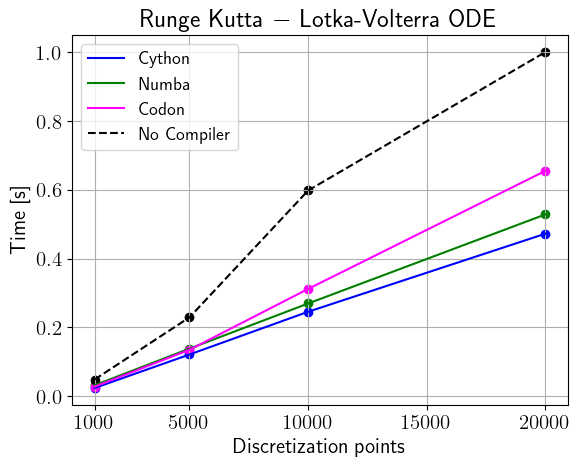

In [13]:
plt.plot(N, list_c, c='blue', label='Cython')
plt.scatter(N, list_c, c='blue')
plt.plot(N, list_n, c='green', label='Numba')
plt.scatter(N, list_n, c='green')
plt.plot(N, list_co, c='magenta', label='Codon')
plt.scatter(N, list_co, c='magenta')
plt.plot(N, list_no, c='black', label='No Compiler', ls='--')
plt.scatter(N, list_no, c='black')

plt.title(r'Runge Kutta $-$ Lotka-Volterra ODE')
plt.xlabel('Discretization points')
plt.ylabel('Time [s]')

plt.xticks([1000, 5000, 10000, 15000, 20000])

plt.legend(fontsize=13)
plt.grid()
plt.show()